# AI in Medicine: Data Science - Basics I
 
## Python Programming: `numpy` and `pandas`

- *Instructor*: Dominique Sydow, AG Volkamer, Charité (dominique.sydow@charite.de)
- *Target audience*: Medical students from the Charité
- *Course date*: July 2020

## 1. Aims of this session

In this talktorial, you will get in touch with **data science**. Using the **Python packages `numpy` and `pandas`**, you will load and work with the RKI COVID-19 dataset for Berlin.

## 2. Learning goals

### Theory

* Data science
* The `numpy` library
* The `pandas` library

### Practical

1. Dataset
2. Read data with `pandas` as `DataFrame`
3. Look at data
4. Select columns
5. Get unique entries in a column
6. Group data

## 3. References

- Data science, machine learning, artificial intelligence
  - http://varianceexplained.org/r/ds-ml-ai/
- Vectors, matrices, tensors
  - https://www.quantstart.com/articles/scalars-vectors-matrices-and-tensors-linear-algebra-for-deep-learning-part-1/
  - https://dev.to/mmithrakumar/scalars-vectors-matrices-and-tensors-with-tensorflow-2-0-1f66
- `numpy`
  - https://numpy.org/doc/stable/user/absolute_beginners.html
  - https://scipy-lectures.org/intro/numpy/array_object.html
- `pandas`
  - https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955
  - https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection
  - https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
- RKI COVID-19 dataset for Berlin
  - https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/data?orderBy=Bundesland&where=Bundesland%20%3D%20%27Berlin%27

## 4. Theory

### Data Science

#### What is the difference between data science, machine learning, and artificial intelligence? 

Adapted from [David Robinson's blog post](http://varianceexplained.org/r/ds-ml-ai/).

The fields data science, machine learning, and artificial intelligence do have a great deal of **overlap**, but they are **not interchangeable**.

#### **Data science** produces **insights**
  - “The average patient has a 70% chance of survival” (descriptive: describe a dataset)
  - “Different patients have different chances of survival” (exploratory: find relationships you did not know about)  
  - “A randomized experiment shows that patients assigned to Alice are more likely to survive than those assigned to Bob” (causal: find out what happens to one variable when you make another variable change)

#### **Machine learning** (ML) produces **predictions**
  - "Predict whether this patient will go into sepsis”
  - “Predict whether this image has a bird in it"

#### **Artificial intelligence** (AI) produces **actions**
  - Game-playing algorithms (Deep Blue, AlphaGo)
  - Robotics and control theory (motion planning, walking a bipedal robot)
  - Optimization (Google Maps choosing a route)

### The `numpy` library

#### Overview

* Role: Scientific computing (with arrays)
* Website: https://numpy.org/
* Description (taken from [here](https://numpy.org/doc/stable/user/absolute_beginners.html)):
> NumPy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.
* Documentation: https://numpy.org/devdocs/

#### Applications

- Create vectors (1D), matrices (2D), tensors (>= 3D) in the form of arrays
- Use a large collection of high-level mathematical functions to operate on these arrays
- Used extensively in `pandas`, `scipy`, `matplotlib`, `scikit-learn` and most other data science and scientific Python packages

![](https://res.cloudinary.com/practicaldev/image/fetch/s--oTgfo1EL--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201a.png)
Figure source: https://dev.to/mmithrakumar/scalars-vectors-matrices-and-tensors-with-tensorflow-2-0-1f66

### The `pandas` library

#### Overview

* Role: Data manipulation and analysis
* Website: https://pandas.pydata.org/
* Description (taken from [here](https://pandas.pydata.org/)):
> Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. 
* Documentation: https://pandas.pydata.org/pandas-docs/stable/

#### Applications

Taken from: https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955

> `pandas` is capable of many tasks including:
>
> * Reading/writing many different data formats
> * Selecting subsets of data
> * Calculating across rows and down columns
> * Finding and filling missing data
> * Applying operations to independent groups within the data
> * Reshaping data into different forms
> * Visualization through matplotlib and seaborn

#### `DataFrame` and `Series`

The `pandas` library has two main containers of data, the `DataFrame` and the `Series`. The `DataFrame` is used more than the `Series`, so let’s take a look at its components.

![`DataFrame` anatomy](https://cdn-images-1.medium.com/max/1600/1*ZSehcrMtBWN7_qCWq_HiSg.png)
Figure source: https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

## 5. Practical

### 5.1. Dataset

We will work with the data on COVID-19 cases which is daily published by the Robert-Koch-Institut (RKI) and is visualized very nicely on the RKI COVID-19 Dashboard (https://corona.rki.de). 
In this notebook we will focus on data for Berlin.
The dataset is freely available [here](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0) - a download is available in this repositories `data/` folder.



### 5.2. Read data with `pandas` as `DataFrame`

In [1]:
import numpy as np
import pandas as pd

First, we import the libraries `numpy` and `pandas` (abbreviated as `np` and `pd` so that we can write shorter code from here on). Libraries are a collection of functionalities that enable you to perform many common tasks without writing the whole code yourself from scratch.

For instance, the `pandas` library provides the function `read_csv()` to read a comma-separated values (csv) file into a so-called `DataFrame`.

**Tip**: You can check out available functionalities of a library in this Jupyter notebook, by writing the library name followed by a dot and then hitting the tab key. All available functionalities will pop up for you to explore. Since there are a lot of options, you can narrow it down by writing e.g. `read` while the popup windows is up. 

See for yourself all the possible file formats that you can read with `pandas`:

We will now use the `read_csv()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)) to load the csv file content as `DataFrame` into the variable `data`.

In [2]:
data = pd.read_csv('./data/RKI_COVID19_Berlin_20200630.csv', delimiter=',')

Let's take a look at that `DataFrame` in `data`.

### 5.3. Look at data

#### `DataFrame` head/tail

Let's have a look at the first few rows of the table using the `head()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)). 

**Note**: We will use this command a lot to avoid printing large tables in this Jupyter notebook.

In [3]:
data.head()  # Shows by default the first 5 entries

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,14998473,11,Berlin,SK Berlin Mitte,A00-A04,M,1,0,2020/03/05 00:00:00,11001,"30.06.2020, 00:00 Uhr",0,-9,2020/03/07 00:00:00,0,1,1,Nicht übermittelt
1,14998474,11,Berlin,SK Berlin Mitte,A00-A04,M,1,0,2020/03/11 00:00:00,11001,"30.06.2020, 00:00 Uhr",0,-9,2020/03/03 00:00:00,0,1,1,Nicht übermittelt
2,14998475,11,Berlin,SK Berlin Mitte,A00-A04,M,1,0,2020/03/14 00:00:00,11001,"30.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
3,14998476,11,Berlin,SK Berlin Mitte,A00-A04,M,1,0,2020/03/18 00:00:00,11001,"30.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,14998477,11,Berlin,SK Berlin Mitte,A00-A04,M,1,0,2020/03/22 00:00:00,11001,"30.06.2020, 00:00 Uhr",0,-9,2020/03/21 00:00:00,0,1,1,Nicht übermittelt


Let's have a look at the last few rows of the table using the `tail()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)). Note that you can pass a number to the `head()` and `tail()` functions to specify how many first/last rows you want to see.

In [4]:
data.tail(2)

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
7331,15005804,11,Berlin,SK Berlin Reinickendorf,A80+,W,1,0,2020/04/23 00:00:00,11012,"30.06.2020, 00:00 Uhr",0,-9,2020/04/22 00:00:00,0,1,1,Nicht übermittelt
7332,15005805,11,Berlin,SK Berlin Reinickendorf,A80+,W,1,0,2020/04/25 00:00:00,11012,"30.06.2020, 00:00 Uhr",0,-9,2020/04/25 00:00:00,0,1,1,Nicht übermittelt


#### `DataFrame` dimensionality

Let's show the number of columns and rows (= dimensionality/shape) of the table in the form of `(number of rows, number of columns)` using `shape`.

In [5]:
data.shape

(7333, 18)

#### `DataFrame` column names

We can get a all columns names using `columns`.

In [6]:
data.columns

Index(['ObjectId', 'IdBundesland', 'Bundesland', 'Landkreis', 'Altersgruppe',
       'Geschlecht', 'AnzahlFall', 'AnzahlTodesfall', 'Meldedatum',
       'IdLandkreis', 'Datenstand', 'NeuerFall', 'NeuerTodesfall', 'Refdatum',
       'NeuGenesen', 'AnzahlGenesen', 'IstErkrankungsbeginn', 'Altersgruppe2'],
      dtype='object')

Let's list here the meaning of a few criteria (see full list on [RKI COVID-19 data download website](https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6)):
- `IdBundesland`: State ID (`1`=Schleswig-Holstein to `16`=Thüringen)
- `Bundesland`: State name
- `Landkreis`: District name
- `IdLandkreis`: District ID (`1001` to `16077`)
- `Altersgruppe`: Age group (6 groups: `0-4`, `5-14`, `15-34`, `35-59`, `60-79`, `80+` and `unbekannt`=unknown)
- `Geschlecht`: Gender (`M`=male, `W`=female and `unbekannt`=unknown)
- `AnzahlFall`: Number of cases in group
- `AnzahlTodesfall`: Number of deaths in group
- `AnzahlGenesen`: Number of recoveries cases in group
- `Meldedatum`: Date when case was reported to the Gesundheitsamt
- `Datenstand`: Date when data was updated

### 5.4 Select columns

Let's select some interesting columns! The `DataFrame` is quite large and we are only interested in a subset of the offered criteria. With `pandas`, it is very easy to slice the columns that you want by the following syntax:

```python
data[list_of_interesting_columns]
```

The list of column names of interest could look like this:
```python
list_of_interesting_columns = ['Bundesland', 'Landkreis']
```

Taking both steps together it looks like this (note the two sets of `[]`, the inner `[]` is part of the list, the outer `[]` is the syntax for `DataFrame` slicing):

In [7]:
data[['Bundesland', 'Landkreis']].head()  # Note the use of .head() to show only the first 5 rows

,Bundesland,Landkreis
0,Berlin,SK Berlin Mitte
1,Berlin,SK Berlin Mitte
2,Berlin,SK Berlin Mitte
3,Berlin,SK Berlin Mitte
4,Berlin,SK Berlin Mitte


Now, let's select all columns of interest in this Jupyter notebook and overwrite `data` with this selection.

We see in the following that it is possible to write a command over multiple lines to make is easier to read.

In [8]:
data = data[
    [
        'Bundesland', 
        'Landkreis', 
        'Altersgruppe', 
        'Geschlecht', 
        'AnzahlFall', 
        'AnzahlTodesfall', 
        'AnzahlGenesen', 
        'Datenstand'
    ]
]

In [9]:
data.head()

,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand
0,Berlin,SK Berlin Mitte,A00-A04,M,1,0,1,"30.06.2020, 00:00 Uhr"
1,Berlin,SK Berlin Mitte,A00-A04,M,1,0,1,"30.06.2020, 00:00 Uhr"
2,Berlin,SK Berlin Mitte,A00-A04,M,1,0,1,"30.06.2020, 00:00 Uhr"
3,Berlin,SK Berlin Mitte,A00-A04,M,1,0,1,"30.06.2020, 00:00 Uhr"
4,Berlin,SK Berlin Mitte,A00-A04,M,1,0,1,"30.06.2020, 00:00 Uhr"


### 5.5 Get unique entries in a column

Now, we'd like to check what kind of entries we can find in a column. 

First, we select a column, similar to how we learned in *Chapter 5.4*. Since we select this time only **one** column, we do not pass the column name as a list but as a simple string.

In [10]:
data['Landkreis'].head()

0    SK Berlin Mitte
1    SK Berlin Mitte
2    SK Berlin Mitte
3    SK Berlin Mitte
4    SK Berlin Mitte
Name: Landkreis, dtype: object

This returns a `Series` (instead of a `DataFrame`):

In [11]:
type(data['Landkreis'])

pandas.core.series.Series

Now let's apply the `unique()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)) and check the districts of Berlin represented in the dataset.

In [12]:
data['Landkreis'].unique()  # Note: Here we pass the single column as string not as list (as shown in Chapter 5.4)

array(['SK Berlin Mitte', 'SK Berlin Friedrichshain-Kreuzberg',
       'SK Berlin Pankow', 'SK Berlin Charlottenburg-Wilmersdorf',
       'SK Berlin Spandau', 'SK Berlin Steglitz-Zehlendorf',
       'SK Berlin Tempelhof-Schöneberg', 'SK Berlin Neukölln',
       'SK Berlin Treptow-Köpenick', 'SK Berlin Marzahn-Hellersdorf',
       'SK Berlin Lichtenberg', 'SK Berlin Reinickendorf'], dtype=object)

There should be 12 districts, let's check with Python's built-in function `len` ([see docs](https://docs.python.org/3/library/functions.html#len)) that returns the length of e.g. list-like objects:

In [13]:
len(
    data['Landkreis'].unique()
)

12

Check available categories for gender (`'Geschlecht'`), age (`'Altersgruppe'`), and the date of data update (`'Datenstand'`).

In [14]:
data['Altersgruppe'].unique()

array(['A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+',
       'unbekannt'], dtype=object)

In [15]:
data['Datenstand'].unique()

array(['30.06.2020, 00:00 Uhr'], dtype=object)

### 5.6. Group data

From https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html:

> By `groupby()` we are referring to a process involving one or more of the following steps:
> * **Splitting** the data into groups based on some criteria.
> * **Applying** a function to each group independently.
> * **Combining** the results into a data structure.


#### Example 1: Get group size with `size()`

**Splitting**: Split data into groups based on a criteria.

In [16]:
data.groupby('Altersgruppe')

In [17]:
type(data.groupby('Altersgruppe'))

pandas.core.groupby.generic.DataFrameGroupBy

**Applying and combining**: Apply function to each group, e.g. get the number of entries in each group using `size()`.

In [18]:
data.groupby('Altersgruppe').size()

Altersgruppe
A00-A04       200
A05-A14       354
A15-A34      2310
A35-A59      2868
A60-A79      1102
A80+          496
unbekannt       3
dtype: int64

The result is combined into a data structure, i.e. `Series`.

In [19]:
type(data.groupby('Altersgruppe').size())

pandas.core.series.Series

With `pandas` it is very easy to quickly plot data using the `plot()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)) - with the parameter `kind` you can specify what plot type you want to plot (in our case we want a barplot).

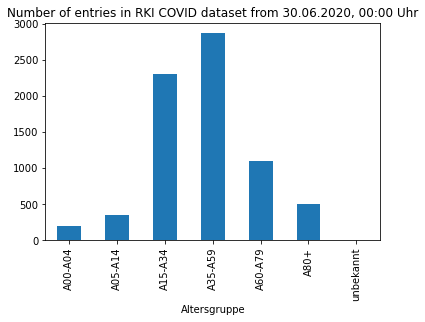

In [20]:
data.groupby('Altersgruppe').size().plot(
    kind='bar', 
    title=f'Number of entries in RKI COVID dataset from {data["Datenstand"].unique()[0]}'
)

#### Example 2: Get group sum with `sum()`

Get the sum of current cases, deaths, and recoveries. 

The columns needed have the following names:

- `AnzahlFall`: Number of cases in group
- `AnzahlTodesfall`: Number of deaths in group
- `AnzahlGenesen`: Number of recoveries in group

In [21]:
print(f'Total number of current COVID-19 cases in Berlin:')
data['AnzahlFall'].sum()

Total number of current COVID-19 cases in Berlin:


8220

In [22]:
print(f'Total number of COVID-19 associated cases in Berlin:')
data['AnzahlTodesfall'].sum()

Total number of COVID-19 associated cases in Berlin:


214

In [23]:
print(f'Total number of COVID-19 recoveries in Berlin:')
data['AnzahlGenesen'].sum()

Total number of COVID-19 recoveries in Berlin:


7328

Get number of current COVID-19 cases by Berlin's districts and compare your findings to the official COVID-19 table for Berlin: 

https://www.berlin.de/lageso/gesundheit/infektionsepidemiologie-infektionsschutz/corona/tabelle-bezirke/

In [24]:
data.groupby('Landkreis')['AnzahlFall'].sum()

Landkreis
SK Berlin Charlottenburg-Wilmersdorf     842
SK Berlin Friedrichshain-Kreuzberg       665
SK Berlin Lichtenberg                    419
SK Berlin Marzahn-Hellersdorf            458
SK Berlin Mitte                         1189
SK Berlin Neukölln                      1011
SK Berlin Pankow                         775
SK Berlin Reinickendorf                  636
SK Berlin Spandau                        445
SK Berlin Steglitz-Zehlendorf            588
SK Berlin Tempelhof-Schöneberg           791
SK Berlin Treptow-Köpenick               401
Name: AnzahlFall, dtype: int64

## 6. Discussion

In this notebook, we saw how quickly possible it is to read in a csv file as `DataFrame` (*Chapter 5.2*) and to start working with it. 
- We got a first impression on our COVID-19 Berlin dataset. We looked at the number of data points (`DataFrame` rows) and criteria (`DataFrame` columns) as well as some example data points, see *Chapter 5.3*.
- We selected interesting columns and checked what kind of column entries we can except, see *Chapter 5.4 and 5.5*. 
- We grouped data by certain criteria (columns), and applied operations on these groups, e.g. we counted the number of group entries or got the sum within each group). We also did some first steps towards plotting with `pandas`, see *Chapter 5.6*. 



### 7. Exercise

#### Exercise 1: Get the first 4 entries in `data`

<details>
<summary> > Solution</summary>
    
```python
data.head(4)
```
    
</details>

#### Exercise 2: Get all column names in `data`

<details>
<summary> > Solution</summary>
    
```python
data.columns
```
    
</details>

#### Exercise 3: Select the column on gender and get its unique entries - what gender categories are collected?

<details>
<summary> > Solution</summary>
    
```python
data['Geschlecht'].unique()
```
    
</details>

#### Exercise 4: Get the number of COVID-19 recoveries in Berlin grouped by Berlin's districts.

<details>
<summary> > Solution</summary>
    
```python
data.groupby('Landkreis')['AnzahlGenesen'].sum()
```
    
</details>

#### Exercise 5: Get the number of COVID-19-associated deaths in Berlin grouped by Berlin's districts.

<details>
<summary> > Solution</summary>
    
```python
data.groupby('Landkreis')['AnzahlTodesfall'].sum()
```
    
</details>

#### Exercise 6: Plot the number of current COVID-19 cases in Berlin grouped by Berlin's districts (barplot).

<details>
<summary> > Solution</summary>
    
```python
data.groupby('Altersgruppe')['AnzahlFall'].sum().plot(
    kind='bar', 
    title=f'Number of COVID-19 cases in Berlin'
)
```
    
</details>